In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pathlib import Path
from sklearn.utils import Bunch
from skimage.io import imread
from skimage.transform import resize

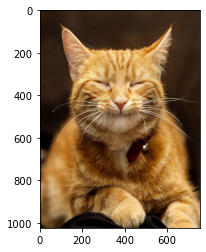

In [11]:
img = plt.imread("Data/Dog_and_Cat/Cat/1.jpg")
plt.imshow(img) # Height of an image is taken as rows & Weight of an image is taken as columns

# Here in the above image the height and width is 753 columns * 1024 rows

In [12]:
from skimage import io, filters

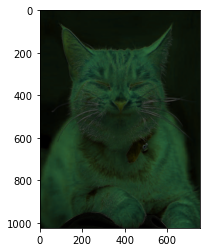

In [13]:
edges = filters.sobel(img)
plt.imshow(edges)

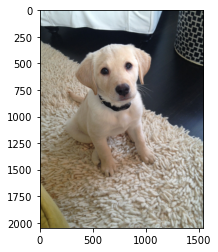

In [14]:
img = plt.imread("Data/Dog_and_Cat/Dog/1.jpg")
plt.imshow(img)

In [15]:
from skimage import io, filters

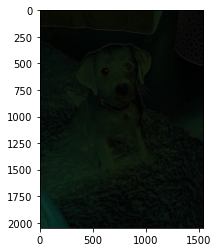

In [16]:
edges = filters.sobel(img)
plt.imshow(edges)

In [17]:
def load_image_files(container_path, dimension=(64, 64)):
    """Loading Multipe Images From the Folder and Which Consists of Different Shape of Data as well as
    
    Parameters
    ----------
    container_path : string or unicode of images in the SubFolders Path to the main folder holding one subfolder[Cat,Dog]
    Each and Every category[Cat, Dog]
    
    Dimensions: We Have Bring Different Images into Same equal shape
    """
    
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    
    descr = """cat and Dog Image Classification Problem"""
    
    images = []
    flat_data = []
    target = []
    
    for i,direc in enumerate(folders):
        for file in direc.iterdir():
            # Before Converting
            img = skimage.io.imread(file)
            plt.imshow(img)
            #plt.show()
            
            # After Converting image
            # Convert Image Shape in 64, 64
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            plt.imshow(img_resized)
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
        
    return Bunch(data=flat_data,
                target=target,
                target_name = categories,
                images = images,
                DESCR = descr)

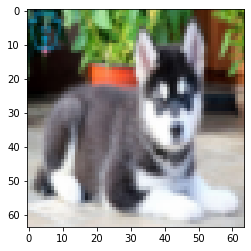

In [18]:
import skimage
image_dataset = load_image_files("Data/Dog_and_Cat/")

In [19]:
image_dataset.keys()

dict_keys(['data', 'target', 'target_name', 'images', 'DESCR'])

In [20]:
image_dataset.data

array([[0.1828125 , 0.11372549, 0.0573223 , ..., 0.65306373, 0.5314951 ,
        0.36211703],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99129902],
       [0.79310087, 0.80784314, 0.80486558, ..., 0.68627451, 0.56078431,
        0.47058824],
       ...,
       [0.35700085, 0.40432033, 0.10046004, ..., 0.14928026, 0.10980392,
        0.03529412],
       [0.93333333, 0.95686275, 0.96078431, ..., 0.35882353, 0.31176471,
        0.27254902],
       [0.3002451 , 0.48302696, 0.36930147, ..., 0.76078431, 0.76078431,
        0.75294118]])

In [21]:
image_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

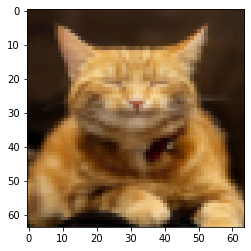

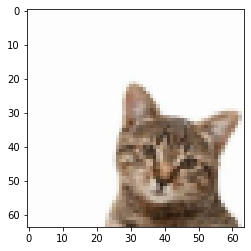

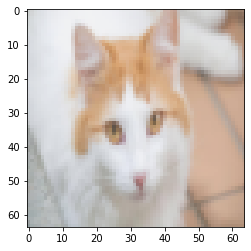

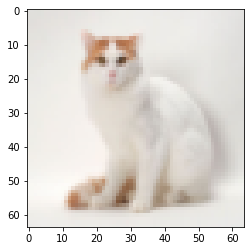

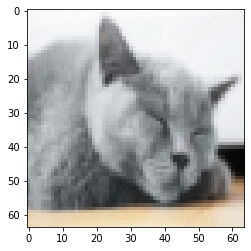

In [22]:
for I in range(5):
    plt.imshow(image_dataset.images[I])
    plt.show()

In [23]:
image_dataset.target_name

['Cat', 'Dog']

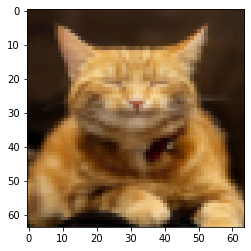

In [24]:
plt.imshow(image_dataset.images[0])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(image_dataset.data,image_dataset.target,random_state=1)
x_train.shape

(165, 12288)

In [27]:
x_test.shape

(55, 12288)

In [28]:
x_train.shape[0] != y_test.shape[0]

True

### Task:
1. Apply Logistic, Bayes, KNN
2. Apply Classification Report
3. Apply Confusion Matrix
5. ROC and AUC Curves


In [29]:
from sklearn.linear_model import LogisticRegression


In [30]:
LR = LogisticRegression(max_iter=500,solver="newton-cg",C=0.001)
LR

LogisticRegression(C=0.001, max_iter=500, solver='newton-cg')

In [31]:
LR.fit(x_train,y_train)


LogisticRegression(C=0.001, max_iter=500, solver='newton-cg')

In [32]:
Train_Score = LR.score(x_train,y_train)
Train_Score

0.8121212121212121

In [33]:
Test_score = LR.score(x_test,y_test)
Test_score

0.7272727272727273

In [34]:
yhat = LR.predict(x_test)
yhat

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [35]:
pd.DataFrame({"Actual Data":y_test,
             "New_predication":yhat})

,Actual Data,New_predication
0,0,0
1,0,0
2,0,1
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [36]:
log_loss = LR.predict_proba(x_train)
log_loss

array([[0.30206271, 0.69793729],
       [0.1767358 , 0.8232642 ],
       [0.19742711, 0.80257289],
       [0.52101015, 0.47898985],
       [0.53296901, 0.46703099],
       [0.20042201, 0.79957799],
       [0.22778946, 0.77221054],
       [0.65701331, 0.34298669],
       [0.4059636 , 0.5940364 ],
       [0.8338152 , 0.1661848 ],
       [0.30853544, 0.69146456],
       [0.4448041 , 0.5551959 ],
       [0.19391545, 0.80608455],
       [0.31590372, 0.68409628],
       [0.83159766, 0.16840234],
       [0.15181657, 0.84818343],
       [0.85500253, 0.14499747],
       [0.17487175, 0.82512825],
       [0.12594261, 0.87405739],
       [0.16557153, 0.83442847],
       [0.65364596, 0.34635404],
       [0.86871476, 0.13128524],
       [0.35045667, 0.64954333],
       [0.17876923, 0.82123077],
       [0.37924724, 0.62075276],
       [0.1841097 , 0.8158903 ],
       [0.81229057, 0.18770943],
       [0.72009387, 0.27990613],
       [0.43823422, 0.56176578],
       [0.20275838, 0.79724162],
       [0.

In [37]:

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [38]:
cm = confusion_matrix(y_test,yhat)
cm

array([[27,  6],
       [ 9, 13]], dtype=int64)

In [39]:
print(classification_report(y_test,yhat))


              precision    recall  f1-score   support

           0       0.75      0.82      0.78        33
           1       0.68      0.59      0.63        22

    accuracy                           0.73        55
   macro avg       0.72      0.70      0.71        55
weighted avg       0.72      0.73      0.72        55



In [40]:
accuracy_score(y_test,yhat)


0.7272727272727273

In [41]:
from sklearn.neighbors import KNeighborsClassifier


In [42]:
Knn = KNeighborsClassifier(n_neighbors=10)


In [43]:
Knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [44]:
Train_score = Knn.score(x_train,y_train)
Train_Score


0.8121212121212121

In [45]:
Test_score = Knn.score(x_test,y_test)
Test_score

0.6545454545454545

In [46]:
Knn.classes_


array([0, 1])

In [47]:
Knn.predict_proba(x_train)


array([[0.2, 0.8],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.7, 0.3],
       [0.3, 0.7],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.5, 0.5],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.5, 0.5],
       [0.8, 0.2],
       [0.1, 0.9],
       [0.9, 0.1],
       [0.3, 0.7],
       [0.1, 0.9],
       [0.2, 0.8],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.3, 0.7],
       [0.4, 0.6],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.3, 0.7],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.3, 0.7],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.7, 0.3],
       [0.4, 0.6],
       [0.5, 0.5],
       [0.4, 0.6],
       [0.9, 0.1],
       [0.2, 0.8],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.3, 0.7],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.3, 0.7],
       [0.4,

In [48]:
from sklearn.metrics import confusion_matrix


In [49]:
cm  = confusion_matrix(y_test, yhat)


In [50]:
print(cm)


[[27  6]
 [ 9 13]]


In [51]:

True_positive = cm[0,0]
True_positive

27

In [52]:

False_negative = cm[0,1]
False_negative

6

In [53]:

False_positive = cm[1,0]
False_positive

9

In [54]:
True_negative = cm[1,1]
True_negative

13

In [55]:
prediction_error = (False_positive + False_negative)/False_positive + False_negative + True_positive + True_negative
prediction_error

47.666666666666664

In [56]:
Accuracy_model = True_positive + True_negative / False_positive + False_negative + True_positive + True_negative
Accuracy_model

74.44444444444444

In [57]:

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[13  9]
 [ 6 27]]


Normalized confusion matrix
[[0.59 0.41]
 [0.18 0.82]]


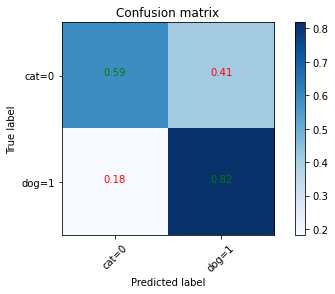

In [58]:

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['cat=0','dog=1'],normalize= True,  title='Confusion matrix')